Análisis de Muestra

Se presenta un análisis de muestra con los archivos de Google y Yelp. Para el análisis de muestra, se utilizó el 10% de cada categoría, esto es debido a que se puede mantener una representación considerable de nuestros datos y se conservan algunos patrones.

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv(r'C:\Users\NOVATEC\Desktop\yelp_final.csv')

Análisis Yelp

Se toma el 10% de toda la población para tener una muestra para analizar.

In [66]:
sample_df = df.groupby('Category').apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)
sample_df

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_27640\3457028021.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Category').apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,Category
0,9i0Fbtc39j0cJQMf5f5YUA,AutoZone Auto Parts,1775 W Hillsborough Ave,Tampa,Florida,33603,27.996500,-82.478810,2.5,7,Car Services
1,hzfkiAxeXuR3jhmhaAN-EQ,AutoZone Auto Parts,3605 E Grant Rd,Tucson,New Mexico,85716,32.251070,-110.915689,3.0,6,Car Services
2,0swhXnJu34189_Kg8e9qOw,Scott Select Used Cars,705 Old Westtown Rd,West Chester,Pennsylvania,19382,39.956117,-75.582884,3.5,9,Car Services
3,5UOk2YeS0PS8iCMm0TO5tQ,Complete Auto Wash & Wax,"211 N Broadway, Ste 112",Saint Louis,Missouri,63102,38.627567,-90.189539,4.5,6,Car Services
4,ii8cpBjx5asP6WQA2sp9Yw,Patterson Precision Auto Repair,7215 Nolensville Rd,Nolensville,Tennessee,37135,35.962682,-86.675234,4.0,9,Car Services
...,...,...,...,...,...,...,...,...,...,...,...
4375,4ASSH2vXJ8nsTGWylKk3RA,United Apparel Liquidators,1814 21st Ave S,Nashville,Tennessee,37212,36.136231,-86.800721,4.0,9,Shopping
4376,0_0jRL1CFchJsqSmJr7X3g,Vape On - Kenner,"2505 Williams Blvd, Ste B",Kenner,Louisiana,70062,30.001702,-90.241358,5.0,5,Shopping
4377,WIfL5FlNJIjlN4gixWzDoQ,H&M,1530 Chestnut St,Philadelphia,Pennsylvania,19102,39.950949,-75.167064,3.0,72,Shopping
4378,wRzkbYY7Dmi8fkgeoYvjVw,Mattress Firm Carrollwood,14454 N Dale Mabry Hwy,Tampa,Florida,33618,28.079266,-82.507323,3.0,9,Shopping


In [67]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   4380 non-null   object 
 1   name          4380 non-null   object 
 2   address       4308 non-null   object 
 3   city          4380 non-null   object 
 4   state         4380 non-null   object 
 5   postal_code   4376 non-null   object 
 6   latitude      4380 non-null   float64
 7   longitude     4380 non-null   float64
 8   stars         4380 non-null   float64
 9   review_count  4380 non-null   int64  
 10  Category      4380 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 376.5+ KB


In [68]:
sample_df.describe()

,latitude,longitude,stars,review_count
count,4380.000000,4380.000000,4380.000000,4380.000000
mean,36.797084,-89.132771,3.518607,46.229909
std,5.896841,14.764719,0.959351,102.023202
min,27.579476,-119.989178,1.000000,5.000000
25%,32.205629,-90.345404,3.000000,8.000000
50%,38.890590,-86.090047,3.500000,17.000000
75%,39.957661,-75.385511,4.000000,41.000000
max,53.641309,-74.684183,5.000000,1868.000000


Boxplot para la distribcón de estrellas por categoría en el que podemos ver la poca presencia de outliers y que las categoróas de Health y Car Services muestran una mayor distrubución, siendo entre 4.5 y 2.5, esto nos habla de la variabilidad que pueden tener estas categorías.

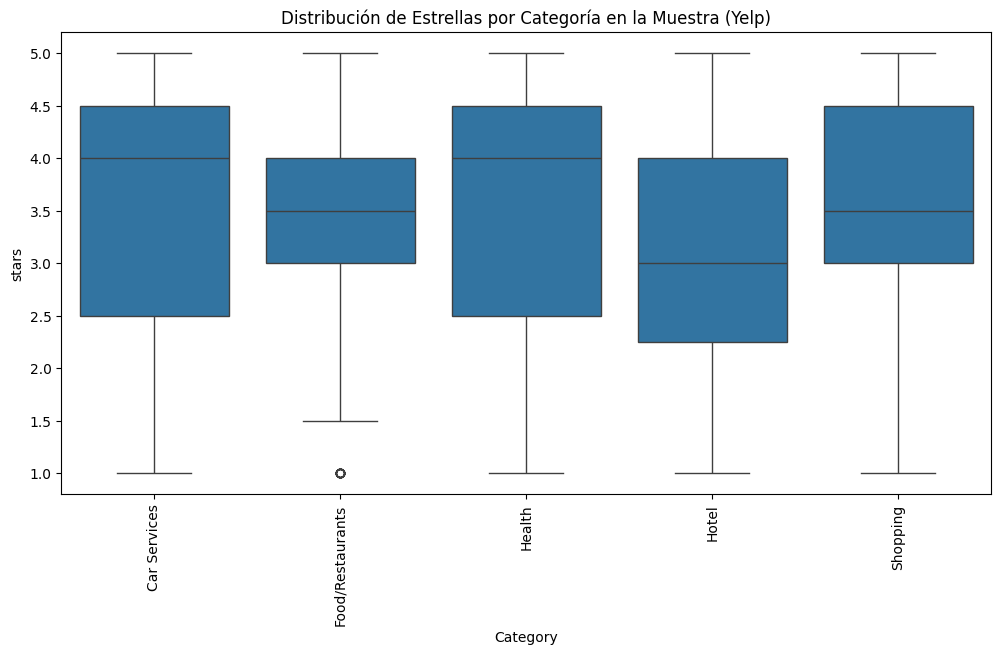

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='stars', data=sample_df)
plt.title('Distribución de Estrellas por Categoría en la Muestra (Yelp)')
plt.xticks(rotation=90)
plt.show()

Barplot del totoal de reseñas por categoría, se observa que Food/Restaurant tiene mayor presencia en la muestra, esto puede ir de la mano de la variabilidad vista en el gráfico pasado y que al tener mayor frecuencia, tiene una estabilidad de las estrellas de sus reseñas.

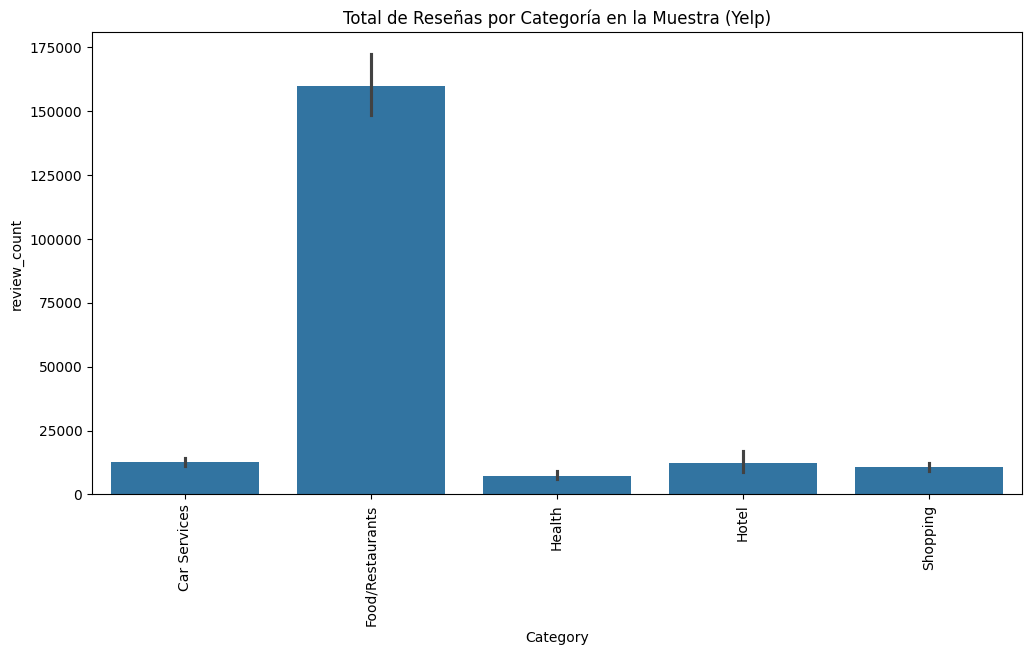

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='review_count', data=sample_df, estimator=sum)
plt.title('Total de Reseñas por Categoría en la Muestra (Yelp)')
plt.xticks(rotation=90)
plt.show()

Promedio de estrellas por categoría

In [71]:
avg_stars_by_category = sample_df.groupby('Category')['stars'].mean().sort_values(ascending=False)
print(avg_stars_by_category)

Category
Health              3.641304
Shopping            3.581541
Car Services        3.573980
Food/Restaurants    3.514224
Hotel               3.053498
Name: stars, dtype: float64


Barplot para número de negocios por estado, en donde claramente Pensylvania tiene mayor presencia, pero más allá de eso; la mayoría de los estados presentes se encuentran en la costa este de los Estados Unidos

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_27640\2735323323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


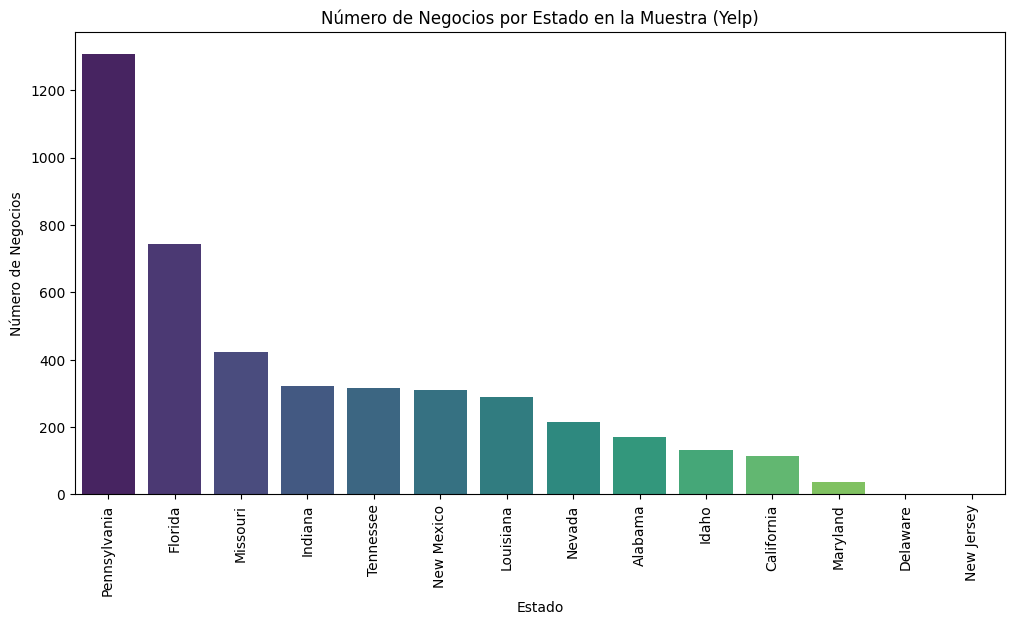

In [72]:
state_counts = sample_df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('Número de Negocios por Estado en la Muestra (Yelp)')
plt.xlabel('Estado')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=90)
plt.show()

Análisis Google

In [73]:
df_google=pd.read_csv(r'C:\Users\NOVATEC\Desktop\google_final.csv')

Al igual que el análisis con Yelp, se utiliza el 10% de cada categoría

In [74]:
sample_df=df_google.groupby('Category').apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)
sample_df

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_27640\1412448368.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df=df_google.groupby('Category').apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)


,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews,relative_results,url,Category,state
0,Lambert's Automotive,"Lambert's Automotive, 3909 Richards St, Rowlet...",0x864ea81da98bb241:0x3e000f85b5b9f798,32.904302,-96.564880,4.6,38,"['0x864c02aa1994b7dd:0x479d0cc4a8a2f21f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Car Services,Texas
1,Duque Auto Glass,"Duque Auto Glass, 2610 NW 7th St, Miami, FL 33125",0x88d9b719391bc653:0xc66a136b218432f3,25.779395,-80.238754,4.6,138,"['0x88d9b6e26a5ed2a3:0xa8b8e12487a26b71', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Car Services,Florida
2,Redmon Insurance Agency,"Redmon Insurance Agency, 405 St Louis Rd, Coll...",0x8875fff8241ae8ed:0xb08656b0b183110c,38.663121,-89.998962,4.9,46,"['0x8875ffa5accef6c3:0x274ae716e2344d7b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Car Services,Missouri
3,Rouge Valley Auto Repair,"Rouge Valley Auto Repair, 11700 Redwood Hwy, W...",0x54c566509175ab9d:0x7123c5ebcdcc5a2d,42.364559,-123.536009,5.0,2,"['0x54c57ae73eb74043:0xe8560b873d403eb4', '0x5...",https://www.google.com/maps/place//data=!4m2!3...,Car Services,Oregon
4,"MOBIS Alabama, LLC - Georgia Plant","MOBIS Alabama, LLC - Georgia Plant, 7001 Kia P...",0x888ca615b1e9d277:0x5849b0bcf49a3410,32.914245,-85.124111,3.4,25,"['0x888ca5d690f26563:0xd03942ec565b00e9', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Car Services,Georgia
...,...,...,...,...,...,...,...,...,...,...,...
27107,Colwick Center,"Colwick Center, 4340 Colwick Rd, Charlotte, NC...",0x8854219cd9fddeb9:0x1567eef4ed0b2940,35.177243,-80.798456,4.3,6,NaN,https://www.google.com/maps/place//data=!4m2!3...,Shopping,South Carolina
27108,Cherry Tree Square,"Cherry Tree Square, 40 Matthew Dr, Uniontown, ...",0x883515d681d90011:0x2e8931d6f01da96b,39.904445,-79.755591,4.1,53,NaN,https://www.google.com/maps/place//data=!4m2!3...,Shopping,Pennsylvania
27109,Oaklandon Plaza,"Oaklandon Plaza, 11725 Pendleton Pike, Indiana...",0x886b4af7d197dd4b:0xf1ada25aeee900f8,39.870177,-85.958788,3.8,8,"['0x886b4af5d8c55491:0xc5523c70b6b3d00c', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Shopping,Indiana
27110,Branch Exchange,"Branch Exchange, 715 Avenue H bldg 740, Sheppa...",0x865327135c0ceb31:0x6937ddaaf65a61d3,33.975934,-98.507162,4.5,68,"['0x8653271344c59ddf:0x8bfebbb1371fab5', '0x86...",https://www.google.com/maps/place//data=!4m2!3...,Shopping,Texas


In [75]:
sample_df.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,27112.000000,27112.000000,27112.000000,27112.000000
mean,37.363371,-92.325633,4.336187,94.149380
std,5.352265,16.902587,0.587659,273.420617
min,8.750457,-159.586592,1.000000,1.000000
25%,33.777417,-101.881478,4.100000,14.000000
50%,38.301380,-87.615132,4.400000,34.000000
75%,41.052051,-79.894298,4.800000,78.000000
max,71.292018,180.000000,5.000000,9893.000000


In [76]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27112 entries, 0 to 27111
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              27112 non-null  object 
 1   address           26926 non-null  object 
 2   gmap_id           27112 non-null  object 
 3   latitude          27112 non-null  float64
 4   longitude         27112 non-null  float64
 5   avg_rating        27112 non-null  float64
 6   num_of_reviews    27112 non-null  int64  
 7   relative_results  23972 non-null  object 
 8   url               27112 non-null  object 
 9   Category          27112 non-null  object 
 10  state             27112 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.3+ MB


Es importante mencionar que la cantidad de datos para Google es el doble que de Yelp, esto es debido a la naturaleza de los datos extraídos, sin embargo, se sigue utilizando el mismo porentaje de muestra.

Boxplot de distribución de rating por categoría, a diferencia de Yelp, Google muestra una mayor media en esta variable, y en este caso, podemos observar que Hotel es la categoría que tiene mayor rango.

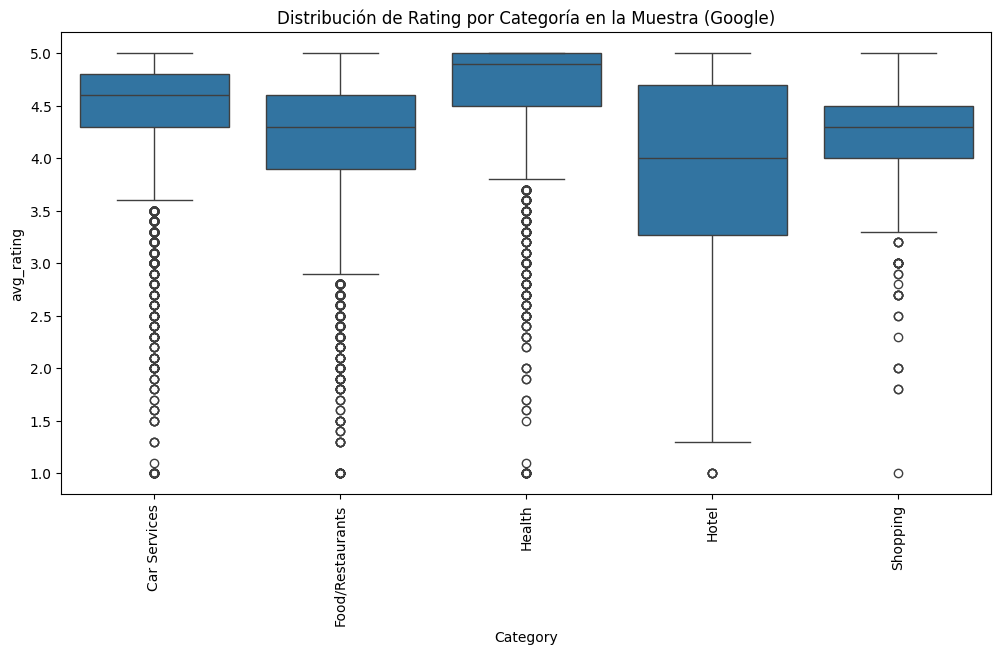

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='avg_rating', data=sample_df)
plt.title('Distribución de Rating por Categoría en la Muestra (Google)')
plt.xticks(rotation=90)
plt.show()

Sin mucha diferencia a Yelp, aquí también ocurre el mimso fenómeno que Restaurant/Food es la categoría que más reseñas tiene.

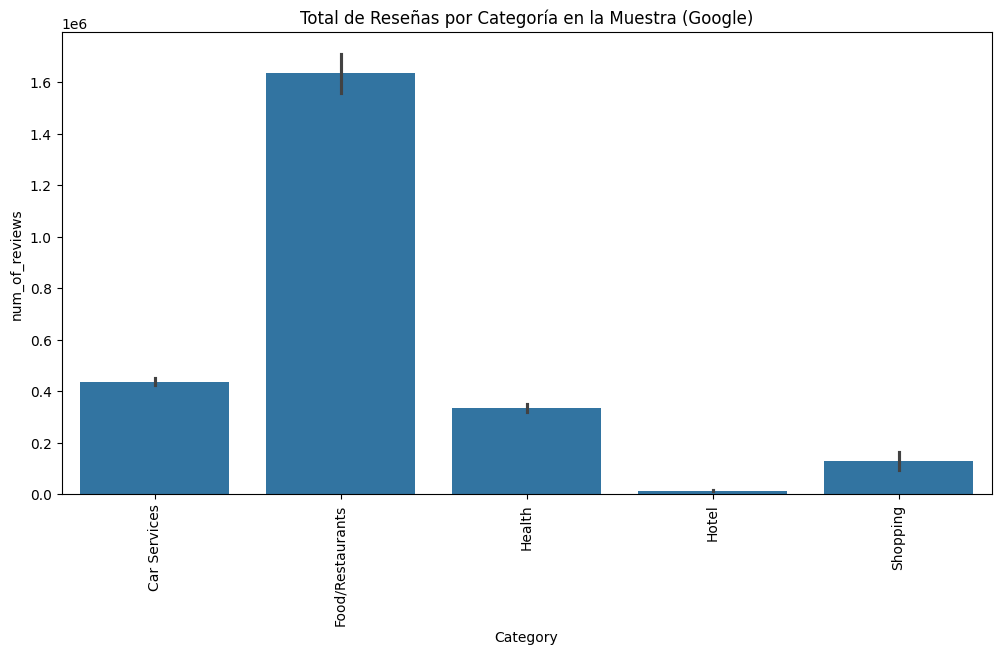

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='num_of_reviews', data=sample_df, estimator=sum)
plt.title('Total de Reseñas por Categoría en la Muestra (Google)')
plt.xticks(rotation=90)
plt.show()

Promedio de Rating por categoría

In [79]:
avg_rating_by_category=sample_df.groupby('Category')['avg_rating'].mean().sort_values(ascending=False)
print(avg_stars_by_category)

Category
Health              3.641304
Shopping            3.581541
Car Services        3.573980
Food/Restaurants    3.514224
Hotel               3.053498
Name: stars, dtype: float64


Barplot del número de negocios por estado, aquí existe una disparidad, ya que, California es el estado con más registros dentro de la muestra. Esto también puede ser debido a la naturaleza de los datos extraídos, y también al hecho de que se decidió trabajar con menos categorías para tener un mejor control y manejo de las mismas.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_27640\1893884839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


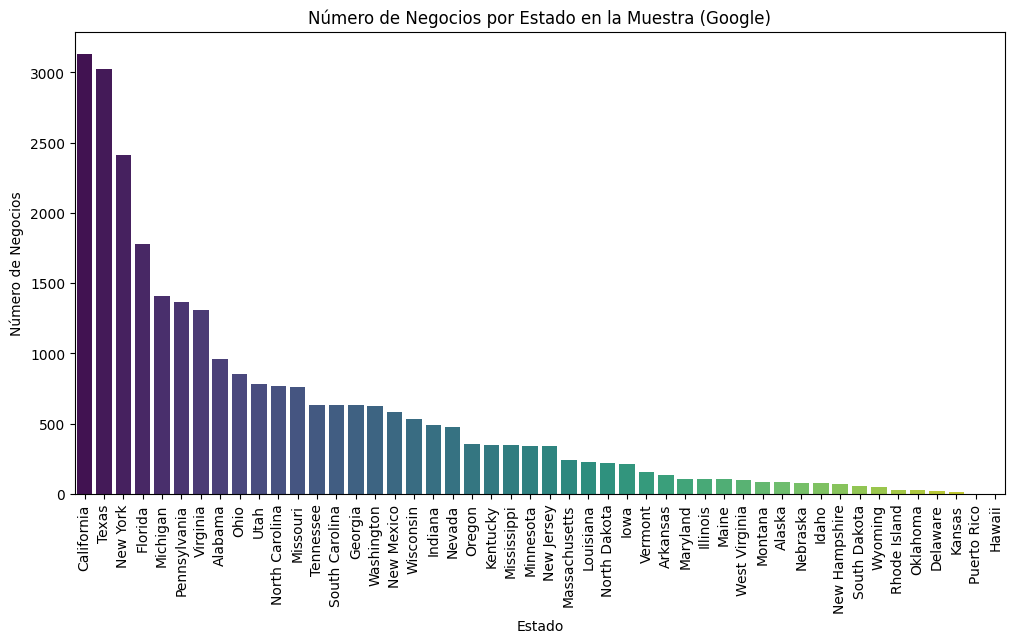

In [80]:
state_counts = sample_df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('Número de Negocios por Estado en la Muestra (Google)')
plt.xlabel('Estado')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=90)
plt.show()

Insights

1.- California es el estado con más negocios en Google, mientras que Pensylvania es el estado con más negocios en Yelp.

2.- Resturant/Food es la categoría con más reseñas.

3.- El promedio de las categorías (rating, estrellas) se encuentra entre 3.0 y 3.6

Conclusiones

Realizar un análisis de muestra nos puede brindar información valiosa que nos puede ayudar a profundizar el entendimiento de nuestros datos, especialmente por tratarse de una cantidad considerable de datos. En este ejercicio, vimos una simulud en cuanto a rating/estrellas, sin embargo, en negocios por estado es donde está la disparidad; aquí es donde podemos ver los cambios a diferencia del análisis inicial de toda nuestra población, estos cambios por lo ya mencionadod de seleccionar solo ciertas categorías.